In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_excel('Boston.xlsx')

In [3]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [4]:
df.shape

(506, 13)

In [5]:
df.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
lstat      float64
medv       float64
dtype: object

## LASSO Regression

In [6]:
y = df['medv']
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [7]:
X = df.drop('medv', axis = 1)
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=222)

In [9]:
X_train

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat
496,0.28960,0.0,9.69,0,0.585,5.390,72.9,2.7986,6,391,19.2,21.14
461,3.69311,0.0,18.10,0,0.713,6.376,88.4,2.5671,24,666,20.2,14.65
295,0.12932,0.0,13.92,0,0.437,6.678,31.1,5.9604,4,289,16.0,6.27
329,0.06724,0.0,3.24,0,0.460,6.333,17.2,5.2146,4,430,16.9,7.34
308,0.49298,0.0,9.90,0,0.544,6.635,82.5,3.3175,4,304,18.4,4.54
...,...,...,...,...,...,...,...,...,...,...,...,...
66,0.04379,80.0,3.37,0,0.398,5.787,31.1,6.6115,4,337,16.1,10.24
14,0.63796,0.0,8.14,0,0.538,6.096,84.5,4.4619,4,307,21.0,10.26
115,0.17134,0.0,10.01,0,0.547,5.928,88.2,2.4631,6,432,17.8,15.76
45,0.17142,0.0,6.91,0,0.448,5.682,33.8,5.1004,3,233,17.9,10.21


In [10]:
X_test

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat
216,0.04560,0.0,13.89,1,0.5500,5.888,56.0,3.1121,5,276,16.4,13.51
238,0.08244,30.0,4.93,0,0.4280,6.481,18.5,6.1899,6,300,16.6,6.36
281,0.03705,20.0,3.33,0,0.4429,6.968,37.2,5.2447,5,216,14.9,4.59
462,6.65492,0.0,18.10,0,0.7130,6.317,83.0,2.7344,24,666,20.2,13.99
288,0.04590,52.5,5.32,0,0.4050,6.315,45.6,7.3172,6,293,16.6,7.60
...,...,...,...,...,...,...,...,...,...,...,...,...
68,0.13554,12.5,6.07,0,0.4090,5.594,36.8,6.4980,4,345,18.9,13.09
421,7.02259,0.0,18.10,0,0.7180,6.006,95.3,1.8746,24,666,20.2,15.70
402,9.59571,0.0,18.10,0,0.6930,6.404,100.0,1.6390,24,666,20.2,20.31
396,5.87205,0.0,18.10,0,0.6930,6.405,96.0,1.6768,24,666,20.2,19.37


In [11]:
# Create a Lasso object
lasso = Lasso()

# Create arrays to store the evaluation metrics
train1_r2_scores = []
test1_r2_scores = []
alphas = list(range(1, 10001, 100))

In [12]:
for alpha in alphas:
    # Train the model on the training data
    lasso.set_params(alpha=alpha)
    lasso.fit(X_train, y_train)

    # Make predictions on the training and testing data
    train_pred = lasso.predict(X_train)
    test_pred = lasso.predict(X_test)

    # Calculate the R-squared score for both training and testing data
    train_r2 = r2_score(y_train, train_pred)
    test_r2 = r2_score(y_test, test_pred)

    # Store the evaluation metrics in the arrays
    train1_r2_scores.append(train_r2)
    test1_r2_scores.append(test_r2)

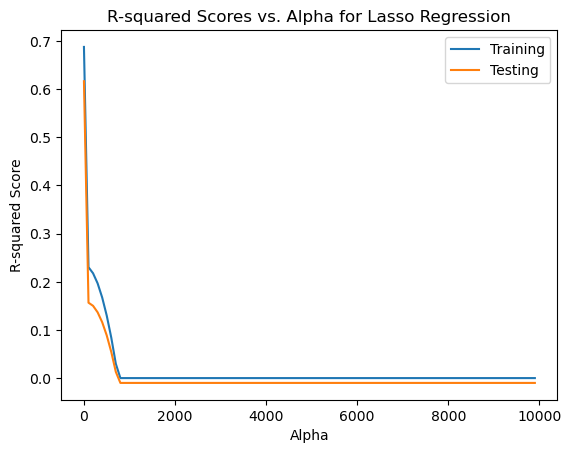

In [13]:
# Plot the training R2 scores against the alpha parameter
plt.plot(alphas, train1_r2_scores, label='Training')
plt.plot(alphas, test1_r2_scores, label='Testing')
plt.xlabel('Alpha')
plt.ylabel('R-squared Score')
plt.title('R-squared Scores vs. Alpha for Lasso Regression')
plt.legend()
plt.show()

In [15]:
# Getting the number of non-zero coefficients of the fitted logistic regressor

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)

    num_nonzero_coefs = np.count_nonzero(lasso.coef_)
    print("Alpha:", alpha, "Non-zero coefficients:", num_nonzero_coefs)

Alpha: 1 Non-zero coefficients: 9
Alpha: 101 Non-zero coefficients: 1
Alpha: 201 Non-zero coefficients: 1
Alpha: 301 Non-zero coefficients: 1
Alpha: 401 Non-zero coefficients: 1
Alpha: 501 Non-zero coefficients: 1
Alpha: 601 Non-zero coefficients: 1
Alpha: 701 Non-zero coefficients: 1
Alpha: 801 Non-zero coefficients: 0
Alpha: 901 Non-zero coefficients: 0
Alpha: 1001 Non-zero coefficients: 0
Alpha: 1101 Non-zero coefficients: 0
Alpha: 1201 Non-zero coefficients: 0
Alpha: 1301 Non-zero coefficients: 0
Alpha: 1401 Non-zero coefficients: 0
Alpha: 1501 Non-zero coefficients: 0
Alpha: 1601 Non-zero coefficients: 0
Alpha: 1701 Non-zero coefficients: 0
Alpha: 1801 Non-zero coefficients: 0
Alpha: 1901 Non-zero coefficients: 0
Alpha: 2001 Non-zero coefficients: 0
Alpha: 2101 Non-zero coefficients: 0
Alpha: 2201 Non-zero coefficients: 0
Alpha: 2301 Non-zero coefficients: 0
Alpha: 2401 Non-zero coefficients: 0
Alpha: 2501 Non-zero coefficients: 0
Alpha: 2601 Non-zero coefficients: 0
Alpha: 2701 N

In [30]:
alpha_values = [0.01, 0.1, 1, 10, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550]

for alpha in alpha_values:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)

    num_nonzero_coefs = np.count_nonzero(lasso.coef_)
    print("Alpha:", alpha, "Non-zero coefficients:", num_nonzero_coefs)

Alpha: 0.01 Non-zero coefficients: 12
Alpha: 0.1 Non-zero coefficients: 11
Alpha: 1 Non-zero coefficients: 9
Alpha: 10 Non-zero coefficients: 3
Alpha: 50 Non-zero coefficients: 2
Alpha: 100 Non-zero coefficients: 1
Alpha: 150 Non-zero coefficients: 1
Alpha: 200 Non-zero coefficients: 1
Alpha: 250 Non-zero coefficients: 1
Alpha: 300 Non-zero coefficients: 1
Alpha: 350 Non-zero coefficients: 1
Alpha: 400 Non-zero coefficients: 1
Alpha: 450 Non-zero coefficients: 1
Alpha: 500 Non-zero coefficients: 1
Alpha: 550 Non-zero coefficients: 1


In [18]:
# As we increase Alpha parameter, we can see that the number of non-zero coefficients decreases and reaches o for very high values of aplha 
# i also used a small range with smaller increments to see actually what is happening to number coefficients as with large range it is not really clear

## Logistic regression

In [19]:
y1 = df['medv']
y1

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [20]:
X1 = df.drop('medv', axis = 1)
X1

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48


In [21]:
y_median = y1.median()

In [24]:
y_binary = (y1 > y_median).astype(int) * 2 - 1

In [25]:
y_binary

0      1
1      1
2      1
3      1
4      1
      ..
501    1
502   -1
503    1
504    1
505   -1
Name: medv, Length: 506, dtype: int32

In [26]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y_binary, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression()

# Fit the model to the training data
model.fit(X1_train, y1_train)

In [31]:
predictions = model.predict(X1_test)

In [32]:
print("Predictions:", predictions)

Predictions: [ 1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1  1  1 -1  1
 -1 -1  1 -1 -1 -1 -1  1  1 -1 -1 -1  1 -1 -1  1 -1  1  1 -1  1 -1 -1  1
 -1  1 -1  1 -1  1  1  1 -1  1  1 -1  1  1  1 -1  1 -1 -1  1  1 -1 -1  1
 -1 -1  1 -1 -1  1 -1 -1 -1 -1  1 -1 -1  1 -1  1  1 -1  1 -1 -1 -1 -1 -1
  1 -1 -1 -1 -1  1]
